### 차원 축소 - PCA
- 배경: 대부분 실무에서 분석하는 데이터는 매우 많은 특성을 가지고 있음. 
- 이러한 데이터를 가지고 머신러닝 알고리즘을 적용해서 문제를 해결하려하면, 데이터 차원이 크기 때문에 학습 속도가 느리고 성능이 좋지 않을 가능성이 있음.

### 차원의 저주
머신러닝에서 데이터셋의 특성(feature)가 많아지면, 각 특성인 하나의 차원(dimension) 또한 증가. 이렇게 데이터의 차원이 증가할 수록 데이터 공간의 부피가 기하 급수적으로 증가하기 때문에, 데이터의 밀도는 차원이 증가할수록 희소해짐. 

데이터의 차원이 증가할수록 데이터 포인트 간의 거리가 증가하게 되므로, 이러한 데이터를 이용해 머신러닝 알고리즘을 학습하게되면 모델이 복잡해짐.
따라서, 오버 피팅의 위험이 커진다.
이러한 차원의 저주를 해결하기 위한 방법 중 하나는 데이터의 밀도가 높아질 때까지 학습 데이터셋의 크기를 늘리는 것이다. 하지만, 데이터셋의 크기에 비해 차원은 기하급수적으로 커지기 때문에 매우 힘든일임.

=> 차원이 증가하면 그것을 표현하기 위한 데이터 양이 기하급수적으로 증가한다는 의미.

### 차원 축소 : 데이터의 의미를 제대로 표현하는 특징을 추려내는 것. 
- 1) 변수 선택: 가지고 있는 변수 중, 중요한 변수만 몇 개 고르고 나머지는 버리는 방법.
 - 중첩되는 변수를 찾을 때 사용하는 방법: 상관 분석.
 - 상관 계수가 높거나 VIF가 높은 중첩되는 변수들 중 하나만 선택

- 2) 변수 추출: 모든 변수를 조합하여 이 데이터를 잘 표현할 수 있는 중요 성분을 가진 새로운 변수 추출
 - 변수 추출을 위해 주로 사용되는 방법: 주성분 분석

### 주성분 분석

 - 데이터의 분포를 가장 잘 표현하는 성분을 찾아주는 것으로, 데이터의 분산(variance)을 최대한 보존하면서 서로 직교하는 새 기저(축)를 찾아, 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간으로 변환하는 기법입니다

 - 주성분: 통계학적으로 데이터들의 분산(데이터가 평균에서 얼마나 떨어져 있는가) 이 가장 큰 방향 벡터를 의미. 

 - 모든 주성분은 다른 주성분들과 상관관계가 없다는(직교한다는) 제약 하에 가장 큰 분산을 가짐.

 - PCA 방향은 데이터 스케일에 매우 민감. 특성의 스케일이 다르고, 모든 특성의 중요도를 동일하게 취급하려면, PCA를 적용하기 전에 특성을 표준화 전처리 해야 함.

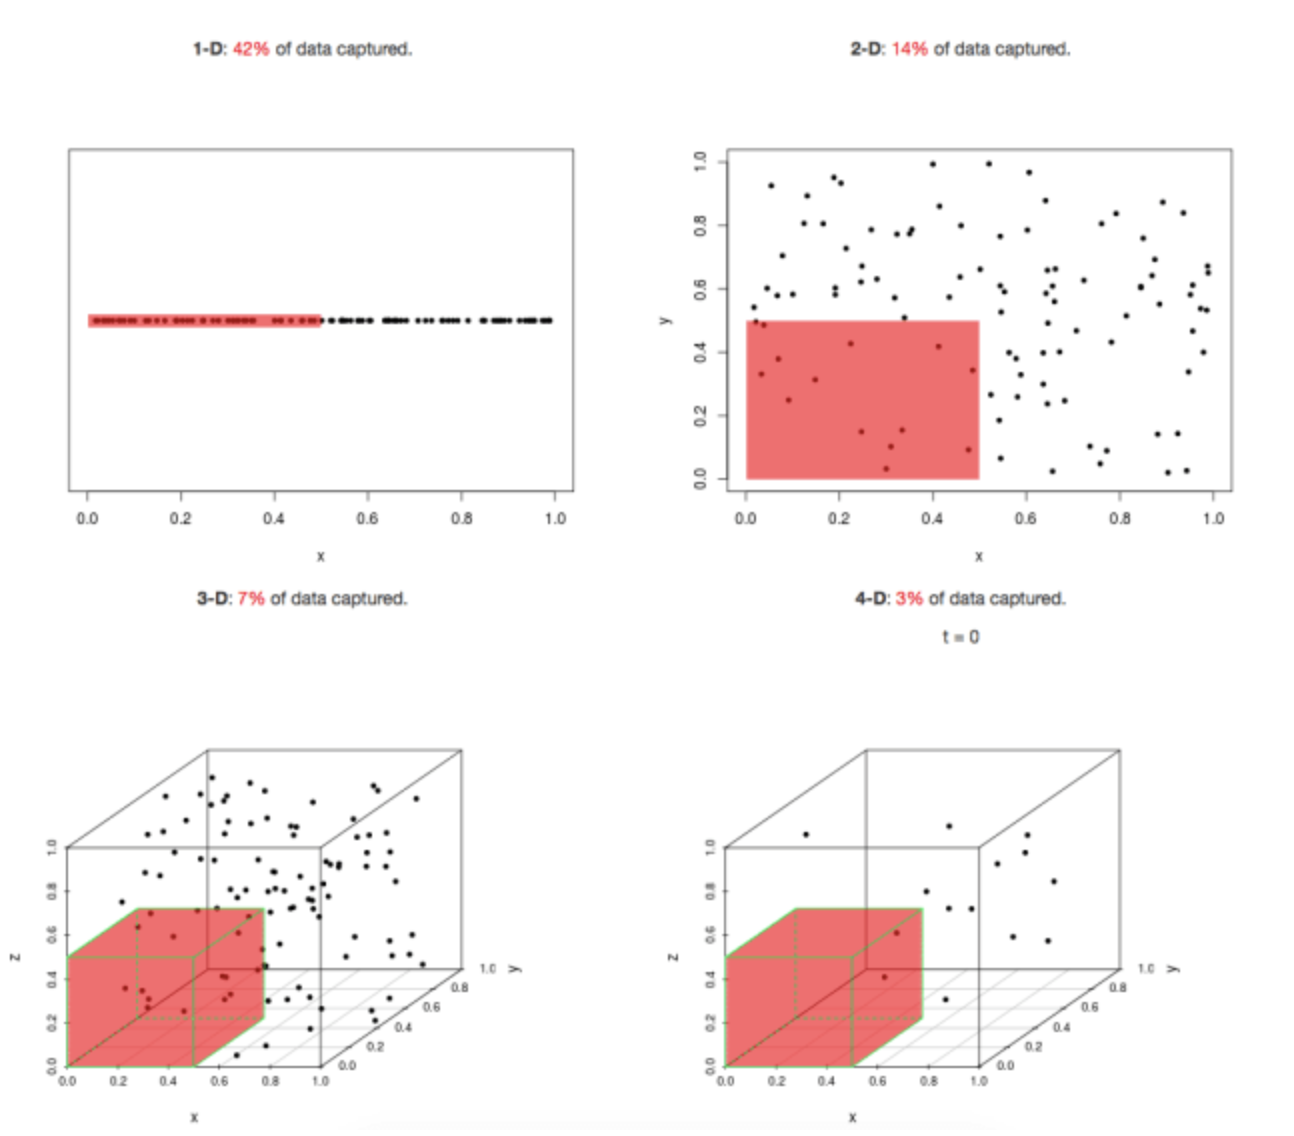

In [23]:
from IPython.display import Image
Image(filename='./image/스크린샷 2020-05-07 오후 6.39.41.png') 

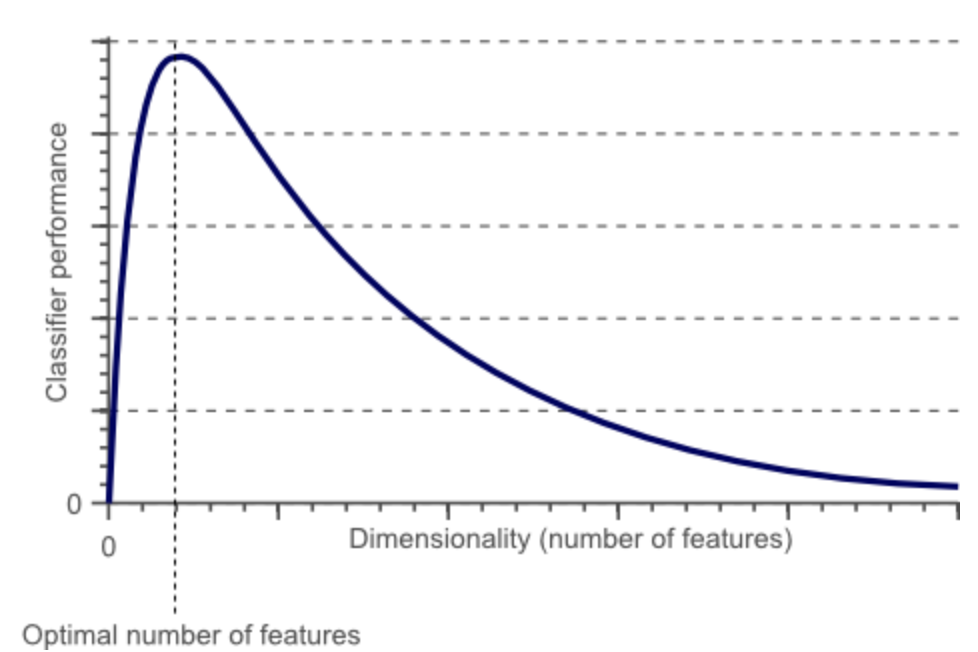

In [24]:
from IPython.display import Image
Image(filename='./image/스크린샷 2020-05-07 오후 6.39.46.png') 

### 5.1 주성분 분석을 통한 비지도 차원 축소

- 특성 선택과 특성 추출의 차이: 원본 특성을 유지하느냐에 있음. 
- 순차 후진 선택 같은 특성 알고리즘을 선택할 때는 원본 특성을 유지하나, 특성 추출은 새로운 특성 공간으로 데이터를 변환하거나 투영함.
- 차원 축소 관점에서 보면, 특성 추출은 대부분의 관련있는 정보를 유지하면서 데이터를 압축하는 방법임. 
- 특성 추출이 저장 공간을 절약하거나 학습 알고리즘의 계산 효율성을 향상할 분만 아니라, 차원의 저주 문제를 감소시켜 예측 성능을 향상하기도 함.(특히 규제가 없는 모델일 때)

### 5.1.1 주성분 분석의 주요 단계 - PCA 전 표준화 전처리 방법

1. d차원 데이터셋을 표준화 전처리
2. 공분산 행렬 만들기
3. 공분산 행렬을 고유 벡터와 고유값으로 분해
4. 고윳값을 내림차순으로 정렬, 그에 해당하는 고유 벡터의 순위 매김
5. 고유값이 가장 큰 k개의 고유 벡터를 선택. 여기서 k는 새로운 특성 부분 공간의 차원(k<=b)
6. 최상위 k개의 고유 벡터로 투영 행렬 W를 만듦.
7. 투영 행렬 W를 이용해서 d차원 입력 데이터셋 X를 새로운 k 차원의 특성 부분 공간으로 변환.

### 5.1.2 주성분 추출 단계
1. 데이터를 표준화 전처리
2. 공분산 행렬을 구성
3. 공분산 행렬의 고윳값과 고유 벡터 구하기
4. 고윳값을 내림차순으로 정렬하여 고유 벡터 순위 매김.

In [1]:
#wine data 불러오기
df_wine = pd.read_csv('https://raw.githubusercontent.com/DS-Heejae/007022/master/code/ch05/wine.data', header=None)

In [2]:
# train 0.7, test 0.3으로 분류

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

#### (1) 특성을 표준화 전처리 하여, 단위 분산을 갖도록 함.

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#### (2) 공분산 행렬을 구성

In [5]:
cov_mat = np.cov(X_train_std.T) #np.cov: 표준화 전처리된 훈련 데이터셋의 공분산 행렬 계산

#### (3) 공분산 행렬의 고윳값과 고유 벡터 구하기

In [6]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) #linalg.eig: 고윳값 분해
print('\n고윳값 \n%s' %eigen_vals) #13개
print('\n고유벡터 \n%s' %eigen_vecs) #13 by 13


고윳값 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]

고유벡터 
[[-1.37242175e-01  5.03034778e-01 -1.37748734e-01 -3.29610003e-03
  -2.90625226e-01  2.99096847e-01  7.90529293e-02 -3.68176414e-01
  -3.98377017e-01 -9.44869777e-02  3.74638877e-01 -1.27834515e-01
   2.62834263e-01]
 [ 2.47243265e-01  1.64871190e-01  9.61503863e-02  5.62646692e-01
   8.95378697e-02  6.27036396e-01 -2.74002014e-01 -1.25775752e-02
   1.10458230e-01  2.63652406e-02 -1.37405597e-01  8.06401578e-02
  -2.66769211e-01]
 [-2.54515927e-02  2.44564761e-01  6.77775667e-01 -1.08977111e-01
  -1.60834991e-01  3.89128239e-04  1.32328045e-01  1.77578177e-01
   3.82496856e-01  1.42747511e-01  4.61583035e-01  1.67924873e-02
  -1.15542548e-01]
 [ 2.06945084e-01 -1.13529045e-01  6.25040550e-01  3.38187002e-02
   5.15873402e-02 -4.05836452e-02  2.23999097e-01 -4.40592110e-01
  -2.43373853e-01 -1.30485780e-01 -4.18953989e-01 -1.10845

### 5.1.3 총 분산과 설명된 분산

- 데이터셋 차원을 새로운 특성 부분 공간으로 압축하여 줄여야 하기에, 가장 많은 정보(분산)을 가진 고유 벡터(주성분) 일부만 선택.
- 고유값은 고유 벡터의 크기를 결정하므로, 고윳값을 내림차순으로 정렬
- 고윳값 순서에 따라 최상위 k개의 고유 벡터 선택

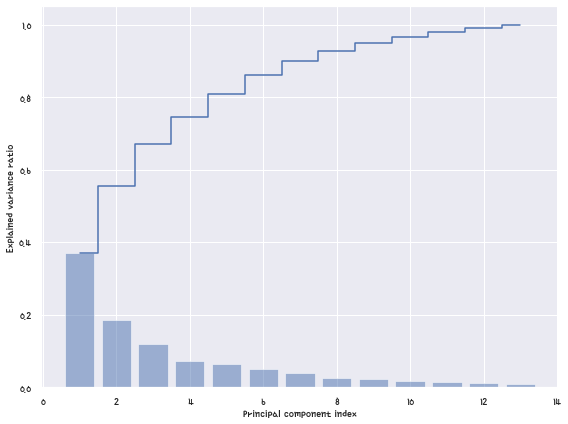

In [12]:
# 가장 정보가 많은 k개의 고유 벡터 설명하기 전에, 고윳값의 설명된 분산 비율을 그래프로 그려보기(고윳값 / 전체 고윳값의 합)

tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,6))

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend
plt.tight_layout()
plt.show()

- 첫 번째 주성분이 거의 분산의 40%를 커버하고 있음.
- 처음 두 개의 주성분이 데이터 셋에 있는 분산의 대략 60%를 설명


- PCA는 비지도 학습이라서, 클래스 레이블에 관한 정보는 사용하지 않음.
- 랜덤 포레스트는 클래스 소속 정보를 사용하여 노드의 불순도를 계산하는 반면, 분산은 특성 축을 따라 값들이 퍼진 정도 측정.

### 5.1.4 특성 변환 : 새로운 주성분 축으로 변환
- 고윳값이 가장 큰 k개의 고유 벡터 선택. k: 새로운 특성 부분 공간의 차원(k<=d)
- 최상위 k개의 고유 벡터로 투영 행렬 W를 만듦.
- 투영 행렬 W를 사용해서 d차원 입력 데이터 셋 X를 새로운 k 차원의 특성 부분 공간으로 변환

= 고윳값의 내림차순으로 고유 벡터를 정렬하고 선택된 고유 벡터로 투영 행렬 구성. 이 투영 행렬을 사용하여 데이터를 저차원 부분 공간으로 변환.


In [13]:
# 고윳값의 내림차순으로 고유 벡터와 고유값의 쌍을 정렬

#(고윳값, 고유 벡터) 튜플의 리스트 만듦
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# 높은 값에서 낮은 값으로 (고윳값, 고유 벡터) 튜플을 정렬
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# 2차원 산점도 그리기 위해, 가장 큰 2개의 고윳값에 해당하는 고유 벡터 선택 => 이 데이터 셋에 있는 분산의 약 60%를 잡아낼 수 있을 것임.
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))

print('투영 행렬 W:\n', w)

투영 행렬 W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


- 최상위 두 개의 고유 벡터로부터 13x2 차원의 투영 행렬 W를 만듦.
- 투영 행렬을 사용하면 샘플 x(1X13 차원의 행 벡터)를 PCA 부분 공간(두 개의 주성분)을 투영하여 x'를 얻을 수 있음.
    - x' = xW

In [14]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

- 전체 124X13 차원의 훈련 데이터셋을 행렬 점곱으로 두 개의 주성분으로 변환 가능
    - X' = XW

In [15]:
X_train_pca = X_train_std.dot(w)

- 마지막으로, 124X2 차원의 행렬로 변환된 Wine 훈련 세트를 2차원 산점도로 시각화하기

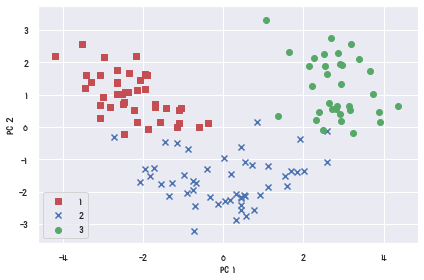

In [16]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

- 데이터가 y축(두 번째 주성분)보다 x축(첫 번째 주성분)을 따라 더 넓게 퍼져있음.
 - 주성분은 고윳값의 크기로 정렬하기 때문에, 첫 번째 주성분이 가장 큰 분산을 가짐.

- 선형 분류기가 클래스들을 잘 분리할 수 있을 것 같다고 직관적으로 알 수 있음.
 - 산점도를 그리기 위한 목적으로 클래스 레이블 정보를 인코딩하였으나, PCA는 어떤 클래스 레이블 정보도 사용하지 않는 비지도 학습 기법이다!

### 5.1.5 사이킷런의 주성분 분석
- 사이킷런의 PCA 클래스: 훈련 데이터를 사용하여 모델을 훈련하고, 같은 모델 파라미터를 사용하여 훈련 데이터와 테스트 데이터를 변환.
- 사이킷런의 PCA 클래스를 Wine 데이터셋의 훈련 세트에 적용하고 로지스틱 회귀로 변환된 샘플 데이터를 분류.
- 결정 경계는 plot_decision_regions 함수 사용해서 그림

In [17]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 준비합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 클래스 샘플을 표시합니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap.colors[idx],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

- 처음 두 개의 주성분을 사용하여 로지스틱 회귀 분류기 훈련

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr = lr.fit(X_train_pca, y_train)

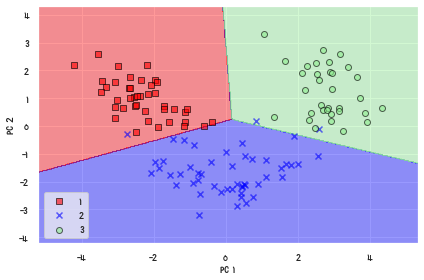

In [19]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

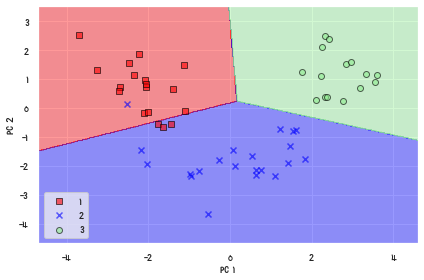

In [20]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [21]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])